# Simulation Exercises

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

## The Monte Hall Problem

The problem is loosely based on the American TV (game) show *Let's Make a Deal* and is named after its original host, Monty Hall. 

The problem became very famous as a quesiton from a reader's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in a US magazine in 1990. 

The question was as follows:

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

### The Problem

There are 3 doors in front of you, and there is a prize behind one of them (a brand new car!).
Once you select a door, the moderator will open one of the two you had not selected which does not have a prize behind it.
You will then have the opportunity to switch from the door you originally selected to an alternate door.

Here are some examples

| Door 1 | Door 2 | Door 3 | Monte Hall opens... | Result from Switch | Result from stay |
|:------:|:------:|:------:|:------------------------:|:------------------:|:----------------:|
|   Car  |  Goat  |  Goat  |        Door 2 or 3       |        Goat        |        Car       |
|  Goat  |   Car  |  Goat  |          Door 3          |         Car        |       Goat       |
|  Goat  |  Goat  |   Car  |          Door 2          |         Car        |       Goat       |

**Question** Is it  better to switch or to stay with your initial choice? (Assuming you want to win the car!)

The problem became so famous because Vos Savant's response was that the contestant should switch to the other door because switching would give you a probability of $\frac{2}{3}$ of winning the car. Many famous mathematicians disputed the result but it turns out that under the above assumptions the answer is actually correct. See [here](https://en.wikipedia.org/wiki/Monty_Hall_problem) for more infos regarding the problem. 

### Solution to Monte Hall Problem

In [154]:
n = 1000
win_no_switch = 0
win_switch = 0

for i in range(n):
    doors = [1,2,3]
    win_door = np.random.choice(doors)
    choice = np.random.choice(doors)
    if win_door == choice: # 1/3
        win_no_switch += 1
    doors_left = doors[:]
    doors_left.remove(choice)
    if any(win_door == doors_left):
        win_switch += 1
print("Prob(Car | Switch) = ", win_switch/n)
print("Prob(Car | No Switch) = ", win_no_switch/n)

Prob(Car | Switch) =  0.649
Prob(Car | No Switch) =  0.351


## Birthday Problem

The birthday problem or birthday paradox concerns the probability that, in a set of n randomly chosen people, some pair of them will have the same birthday. The problem is a good example that assessing probabilities is often difficult and results are often non-intuitive. 



> Given a room with 23 randomly selected pople, what is the probability that at least two have the same birthday?

### Solution to birthday problem

In [155]:
def simulate_birthdays(n,group_size):
    same_day = 0
    alldays = np.arange(1,366,1)
    for i in range(n):
        bdays = np.random.choice(alldays,size=group_size,replace=True)
        if len(bdays) != len(set(bdays)):
            same_day += 1
    return same_day / n

In [135]:
n = 1_000
group_size = 23
simulate_birthdays(n,group_size)

0.507

In [150]:
n = 100
prob_by_group_size = [simulate_birthdays(n,s) for s in np.arange(1,101,1)]
#prob_by_group_size2 = [simulate_birthdays(n,s) for s in np.arange(1,101,1)]

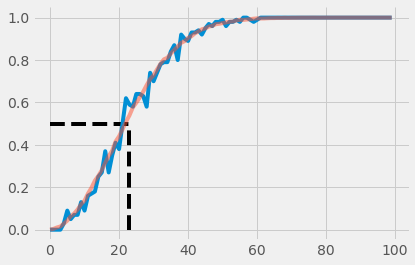

In [153]:
plt.plot(prob_by_group_size)
#plt.plot(prob_by_group_size2, alpha=0.5)
plt.vlines(23,ymin=0,ymax=0.5,linestyles="--")
plt.hlines(0.5,xmin=0, xmax=23, linestyles="--");
sns.despine()

Note: the mathematical solution to this problem can be derived as follows:

- there are $m = 365^n$ combinations of birthdays for a group of $n$ people

    **example**: two people = $365^2 = 133.225$ combinations)
- of these combinations there are only $u = 365 \cdot 364 \cdot \ldots \cdot (365 - (n - 1))$ non-overlapping combinations

    **exmample**: two people. The first person has 365 possible birthdays, but the second can only have his birthday on 364 days if the birthday is not the same day
    
- this gives the probability of $$\frac{u}{m} = \frac{365 \cdot 364 \cdot \ldots \cdot (365 - (n - 1))}{365^n}$$ 

    for $n$ persons that have their birthdays on different (i.e. non overlapping) days. 
    
- the probability for an overla is the $$P = 1 - \frac{u}{m}$$

- this can be approximated using $$P \approx = 1 - \frac{365!}{(365-n)! \cdot 365^n}$$

Let's check if the analytical result matches the simulation

In [178]:
import math

In [184]:
days = 365
n = 23
P = 1 - math.factorial(days) / (math.factorial(days-n) * days**n)
P

0.5072972343239854